# Getting Started with OpenCV

## Learning Objectives

By the end of this notebook, you will be able to:
- Load and display images using OpenCV
- Save images to files
- Work with video files and webcam feeds
- Draw shapes (lines, rectangles, circles, etc.) on images
- Add text to images
- Understand the "Tiga Sekawan" and "Empat Sekawan" concepts

---

## Setup

First, let's import the libraries we'll need:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Configure matplotlib for better display in notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

print("Libraries imported successfully!")
print(f"OpenCV version: {cv.__version__}")

Libraries imported successfully!
OpenCV version: 4.12.0


---

## Part 1: Working with Images

### The "Tiga Sekawan" (Three Companions)

When working with images in OpenCV, you'll use these three essential functions:

1. **`cv.imread()`** - Read an image from a file
2. **`cv.imshow()`** - Display an image in a window
3. **`cv.waitKey()`** - Wait for a keyboard press

### Loading an Image

Let's start by creating a sample image to work with:

In [2]:
# Create a sample image (since we might not have external images yet)
# Create a colorful gradient image
sample_image = np.zeros((400, 600, 3), dtype=np.uint8)

# Create a gradient effect
for i in range(400):
    for j in range(600):
        sample_image[i, j] = [int(i/400 * 255), int(j/600 * 255), 128]

# Save this as our sample image
cv.imwrite('sample_image.jpg', sample_image)
print("Sample image created and saved as 'sample_image.jpg'")

Sample image created and saved as 'sample_image.jpg'


In [3]:
# Now let's load the image using cv.imread()
img = cv.imread("sample_image.jpg")

# Check if image was loaded successfully
if img is None:
    print("Error: Could not load image!")
else:
    print("Image loaded successfully!")
    print(f"Image shape: {img.shape}")  # (height, width, channels)
    print(f"Image size: {img.size} pixels")  # total number of elements
    print(f"Image data type: {img.dtype}")  # data type of pixel values

Image loaded successfully!
Image shape: (400, 600, 3)
Image size: 720000 pixels
Image data type: uint8


### Displaying Images

**Important Note**: OpenCV uses BGR (Blue-Green-Red) color format, while most other libraries use RGB (Red-Green-Blue).

When displaying images with Matplotlib, we need to convert BGR to RGB:

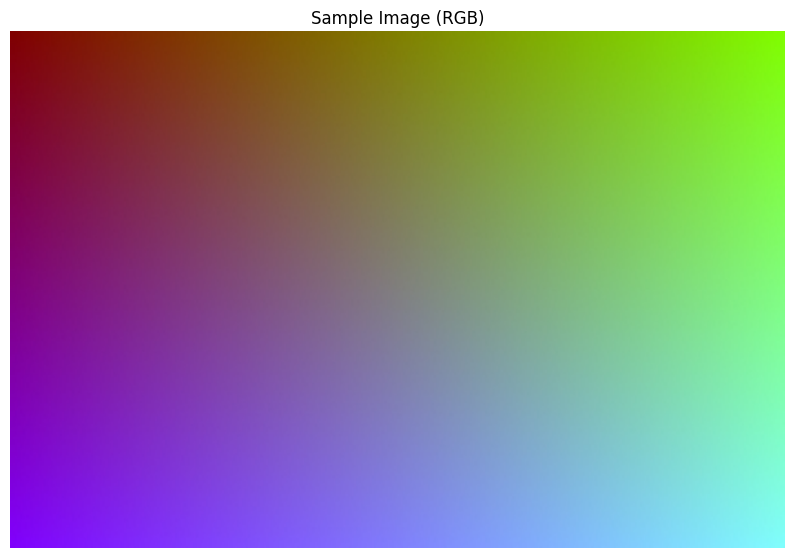

Image displayed successfully!


In [4]:
# Display using Matplotlib (recommended for Jupyter notebooks)
# Convert BGR to RGB for correct color display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Sample Image (RGB)')
plt.axis('off')  # Hide axis
plt.show()

print("Image displayed successfully!")

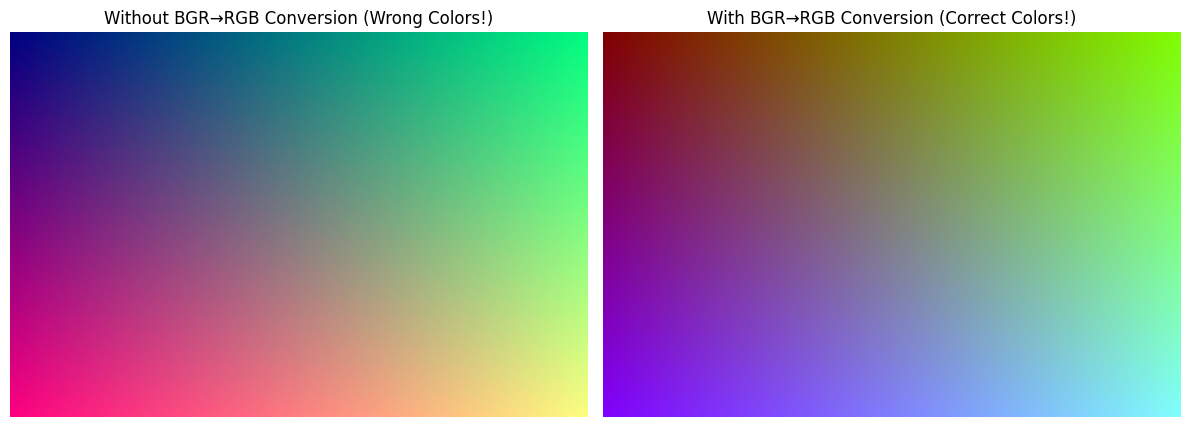

In [5]:
# What happens if we don't convert BGR to RGB?
plt.figure(figsize=(12, 5))

# BGR (incorrect colors)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Without BGR→RGB Conversion (Wrong Colors!)')
plt.axis('off')

# RGB (correct colors)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('With BGR→RGB Conversion (Correct Colors!)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Saving Images

You can save images using `cv.imwrite()`:

In [6]:
# Save the image with a new name
success = cv.imwrite('saved_image.jpg', img)

if success:
    print("Image saved successfully as 'saved_image.jpg'")
else:
    print("Failed to save image")

Image saved successfully as 'saved_image.jpg'


---

## Part 2: Working with Video

### The "Empat Sekawan" (Four Companions)

For video processing, you need four essential functions:

1. **`cv.VideoCapture()`** - Capture video from camera or file
2. **`cap.read()`** - Read a frame from the video
3. **`cv.imshow()`** - Display the frame
4. **`cap.release()`** - Release the video capture object

### Understanding Video

A video is simply a sequence of images (called frames) displayed rapidly:
- Typical frame rate: 24-30 frames per second (fps)
- Each frame is an image that can be processed individually

### Creating a Sample Video

Let's create a simple animated video:

In [7]:
# Create a sample video (a moving circle)
# Video parameters
frame_width = 640
frame_height = 480
fps = 30
duration = 3  # seconds
total_frames = fps * duration

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
out = cv.VideoWriter('sample_video.mp4', fourcc, fps, (frame_width, frame_height))

# Create frames with a moving circle
for i in range(total_frames):
    # Create a blank frame
    frame = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
    
    # Calculate circle position (moves from left to right)
    x = int((i / total_frames) * frame_width)
    y = frame_height // 2
    
    # Draw a red circle
    cv.circle(frame, (x, y), 30, (0, 0, 255), -1)
    
    # Write the frame
    out.write(frame)

# Release the video writer
out.release()
print(f"Sample video created: {total_frames} frames at {fps} fps")

Sample video created: 90 frames at 30 fps


### Reading Video from File

Now let's read the video we just created:

In [8]:
# Open the video file
cap = cv.VideoCapture('sample_video.mp4')

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
else:
    # Get video properties
    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv.CAP_PROP_FPS))
    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    
    print("Video Properties:")
    print(f"  Resolution: {width}x{height}")
    print(f"  FPS: {fps}")
    print(f"  Total frames: {frame_count}")
    print(f"  Duration: {frame_count/fps:.2f} seconds")
    
    # Release the capture
    cap.release()

Video Properties:
  Resolution: 640x480
  FPS: 30
  Total frames: 90
  Duration: 3.00 seconds


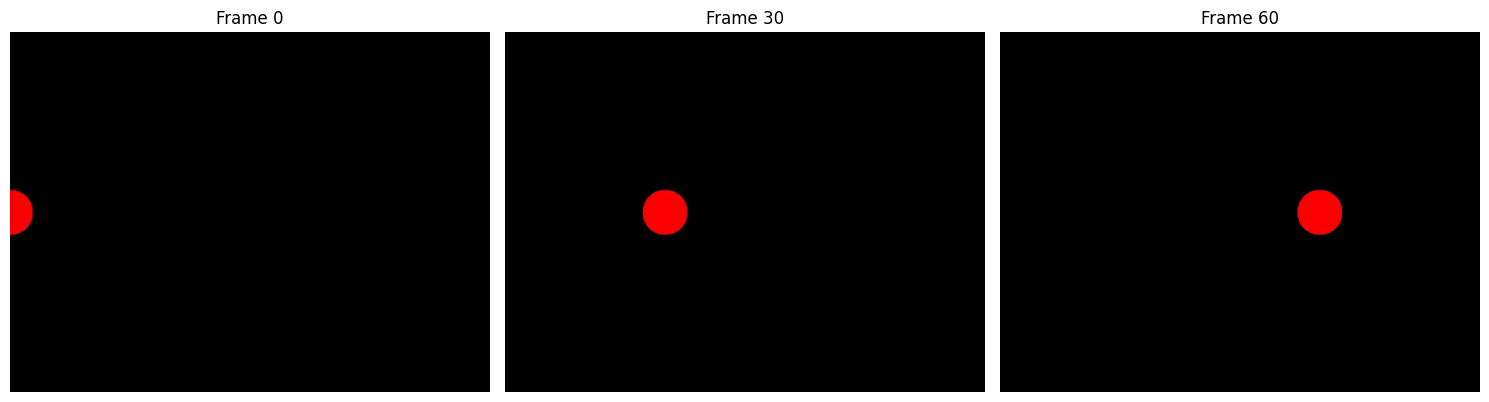

Displayed three frames from the video


In [9]:
# Read and display specific frames
cap = cv.VideoCapture('sample_video.mp4')

# Display frames at different time points
frame_numbers = [0, 30, 60]  # Frame 0, 30, and 60
frames = []

for frame_num in frame_numbers:
    # Set the frame position
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_num)
    
    # Read the frame
    ret, frame = cap.read()
    
    if ret:
        frames.append(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

cap.release()

# Display the frames
plt.figure(figsize=(15, 4))
for i, frame in enumerate(frames):
    plt.subplot(1, 3, i+1)
    plt.imshow(frame)
    plt.title(f'Frame {frame_numbers[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Displayed three frames from the video")

### Converting to Grayscale (for Faster Processing)

Grayscale images are often used in video processing because:
- They're faster to process (1 channel instead of 3)
- They require less memory
- Many computer vision algorithms work better with grayscale

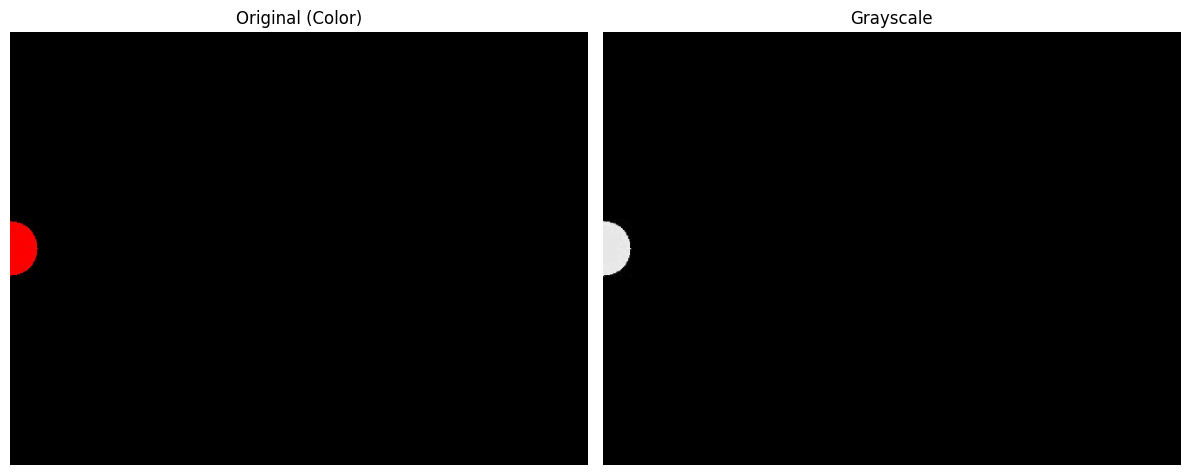

Color frame shape: (480, 640, 3)
Gray frame shape: (480, 640)
Memory reduced by ~67%


In [10]:
# Read a frame and convert to grayscale
cap = cv.VideoCapture('sample_video.mp4')
ret, frame = cap.read()
cap.release()

if ret:
    # Convert to grayscale
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Display comparison
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    plt.title('Original (Color)')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gray_frame, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Color frame shape: {frame.shape}")
    print(f"Gray frame shape: {gray_frame.shape}")
    print(f"Memory reduced by ~{(1 - gray_frame.size/frame.size)*100:.0f}%")

---

## Part 3: Drawing Functions in OpenCV

OpenCV provides powerful functions to draw shapes and text on images. This is useful for:
- Marking detected objects
- Creating annotations
- Visualizing results
- Creating graphics

### Creating a Canvas

Let's create a blank canvas to draw on:

In [11]:
# Create a white canvas
canvas = np.ones((512, 512, 3), dtype=np.uint8) * 255

print("Canvas created (512x512 pixels, white background)")

Canvas created (512x512 pixels, white background)


### Drawing Lines

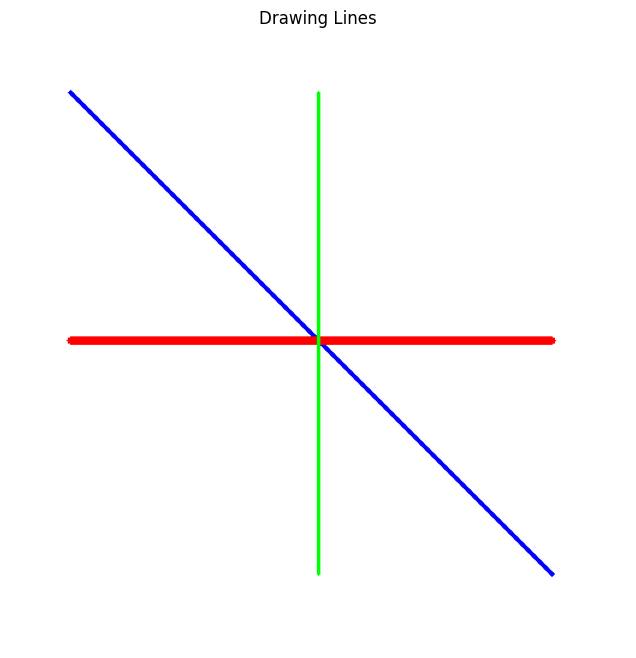

In [12]:
# Draw a line
# cv.line(image, start_point, end_point, color, thickness)
line_img = canvas.copy()

# Draw a blue diagonal line
cv.line(line_img, (50, 50), (450, 450), (255, 0, 0), 3)

# Draw a red horizontal line
cv.line(line_img, (50, 256), (450, 256), (0, 0, 255), 5)

# Draw a green vertical line
cv.line(line_img, (256, 50), (256, 450), (0, 255, 0), 2)

plt.imshow(cv.cvtColor(line_img, cv.COLOR_BGR2RGB))
plt.title('Drawing Lines')
plt.axis('off')
plt.show()

### Drawing Rectangles

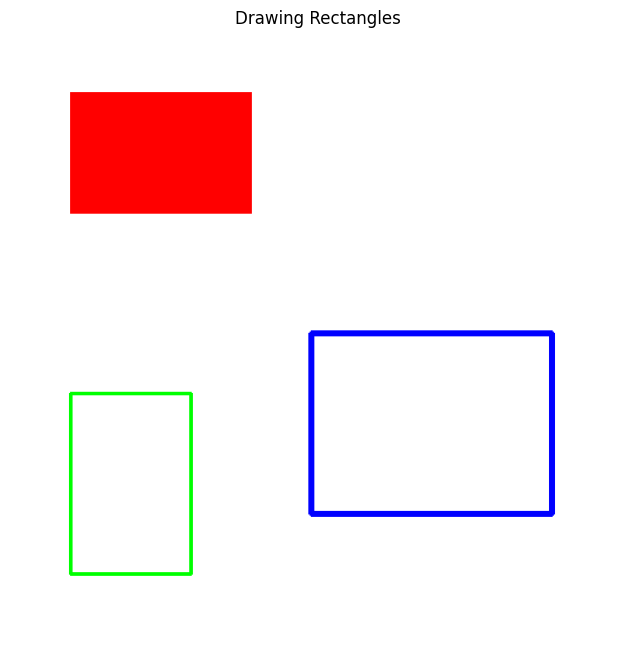

In [13]:
# Draw rectangles
# cv.rectangle(image, top_left, bottom_right, color, thickness)
# Use thickness=-1 for filled rectangle
rect_img = canvas.copy()

# Filled red rectangle
cv.rectangle(rect_img, (50, 50), (200, 150), (0, 0, 255), -1)

# Blue rectangle outline
cv.rectangle(rect_img, (250, 250), (450, 400), (255, 0, 0), 3)

# Green rectangle with thin outline
cv.rectangle(rect_img, (50, 300), (150, 450), (0, 255, 0), 2)

plt.imshow(cv.cvtColor(rect_img, cv.COLOR_BGR2RGB))
plt.title('Drawing Rectangles')
plt.axis('off')
plt.show()

### Drawing Circles

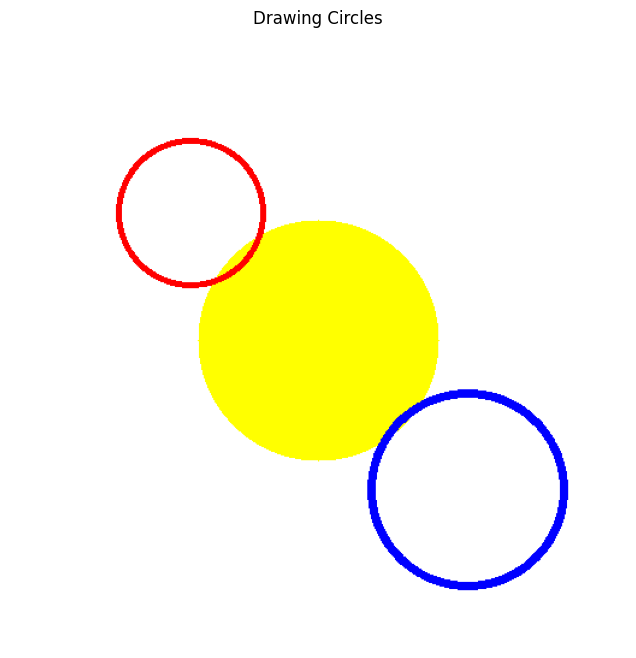

In [14]:
# Draw circles
# cv.circle(image, center, radius, color, thickness)
circle_img = canvas.copy()

# Filled yellow circle
cv.circle(circle_img, (256, 256), 100, (0, 255, 255), -1)

# Red circle outline
cv.circle(circle_img, (150, 150), 60, (0, 0, 255), 3)

# Blue circle with thick outline
cv.circle(circle_img, (380, 380), 80, (255, 0, 0), 5)

plt.imshow(cv.cvtColor(circle_img, cv.COLOR_BGR2RGB))
plt.title('Drawing Circles')
plt.axis('off')
plt.show()

### Drawing Ellipses

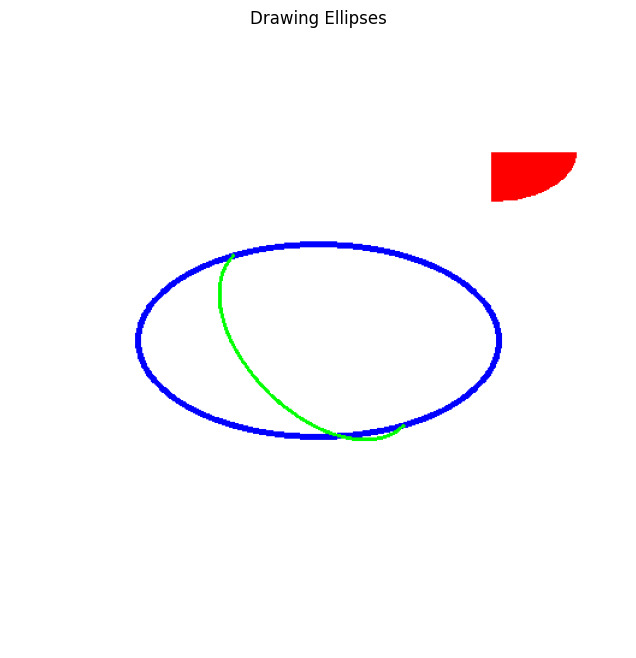

In [15]:
# Draw ellipses
# cv.ellipse(image, center, (major_axis, minor_axis), angle, start_angle, end_angle, color, thickness)
ellipse_img = canvas.copy()

# Full ellipse (0° to 360°)
cv.ellipse(ellipse_img, (256, 256), (150, 80), 0, 0, 360, (255, 0, 0), 3)

# Half ellipse (0° to 180°) - rotated 45°
cv.ellipse(ellipse_img, (256, 256), (100, 60), 45, 0, 180, (0, 255, 0), 2)

# Quarter ellipse (filled)
cv.ellipse(ellipse_img, (400, 100), (70, 40), 0, 0, 90, (0, 0, 255), -1)

plt.imshow(cv.cvtColor(ellipse_img, cv.COLOR_BGR2RGB))
plt.title('Drawing Ellipses')
plt.axis('off')
plt.show()

### Drawing Polygons

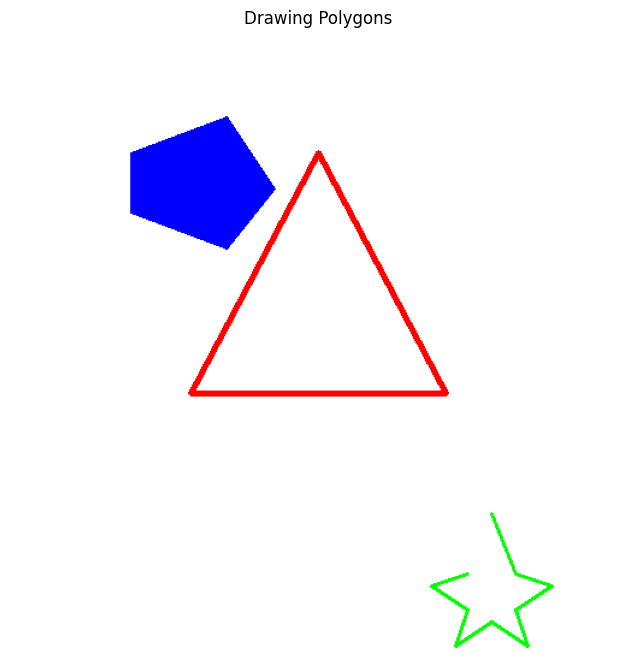

In [16]:
# Draw polygons
# cv.polylines(image, [points], is_closed, color, thickness)
poly_img = canvas.copy()

# Triangle (closed)
triangle = np.array([[256, 100], [150, 300], [362, 300]], np.int32)
cv.polylines(poly_img, [triangle], True, (0, 0, 255), 3)

# Pentagon (filled)
pentagon = np.array([[100, 100], [180, 70], [220, 130], [180, 180], [100, 150]], np.int32)
cv.fillPoly(poly_img, [pentagon], (255, 0, 0))

# Star shape (open - not closed)
star = np.array([[400, 400], [420, 450], [450, 460], [420, 480], [430, 510], 
                 [400, 490], [370, 510], [380, 480], [350, 460], [380, 450]], np.int32)
cv.polylines(poly_img, [star], False, (0, 255, 0), 2)

plt.imshow(cv.cvtColor(poly_img, cv.COLOR_BGR2RGB))
plt.title('Drawing Polygons')
plt.axis('off')
plt.show()

### Adding Text to Images

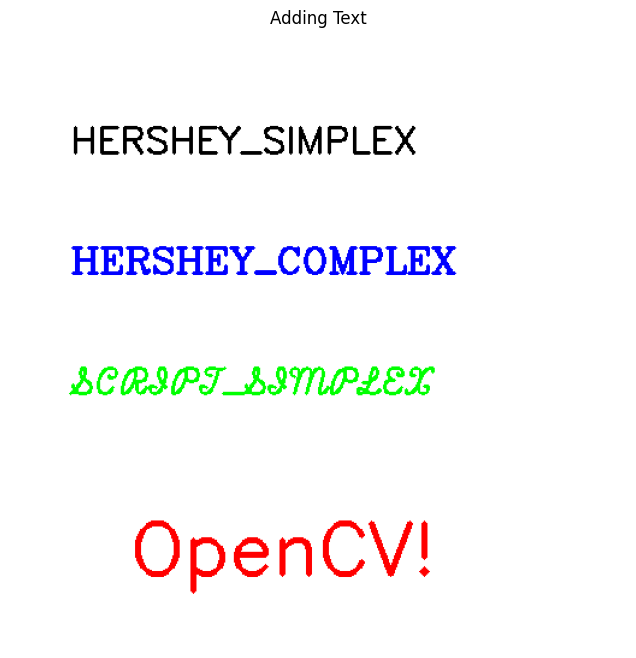

In [17]:
# Add text to images
# cv.putText(image, text, position, font, font_scale, color, thickness)
text_img = canvas.copy()

# Different fonts
font1 = cv.FONT_HERSHEY_SIMPLEX
font2 = cv.FONT_HERSHEY_COMPLEX
font3 = cv.FONT_HERSHEY_SCRIPT_SIMPLEX

# Add text with different fonts and styles
cv.putText(text_img, 'HERSHEY_SIMPLEX', (50, 100), font1, 1, (0, 0, 0), 2)
cv.putText(text_img, 'HERSHEY_COMPLEX', (50, 200), font2, 1, (255, 0, 0), 2)
cv.putText(text_img, 'SCRIPT_SIMPLEX', (50, 300), font3, 1, (0, 255, 0), 2)

# Large bold text
cv.putText(text_img, 'OpenCV!', (100, 450), font1, 2, (0, 0, 255), 4)

plt.imshow(cv.cvtColor(text_img, cv.COLOR_BGR2RGB))
plt.title('Adding Text')
plt.axis('off')
plt.show()

### Combining All Drawing Functions

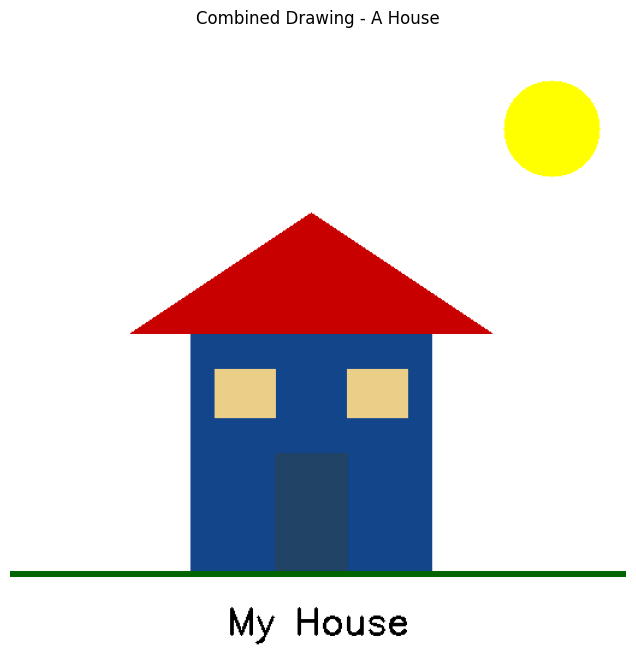

Artwork saved as 'my_house.jpg'


In [18]:
# Create a complex drawing
art = np.ones((512, 512, 3), dtype=np.uint8) * 255

# Draw a house
# House base (rectangle)
cv.rectangle(art, (150, 250), (350, 450), (139, 69, 19), -1)

# Roof (triangle)
roof = np.array([[250, 150], [100, 250], [400, 250]], np.int32)
cv.fillPoly(art, [roof], (0, 0, 200))

# Door (rectangle)
cv.rectangle(art, (220, 350), (280, 450), (101, 67, 33), -1)

# Windows (rectangles)
cv.rectangle(art, (170, 280), (220, 320), (135, 206, 235), -1)
cv.rectangle(art, (280, 280), (330, 320), (135, 206, 235), -1)

# Sun (circle)
cv.circle(art, (450, 80), 40, (0, 255, 255), -1)

# Ground (line)
cv.line(art, (0, 450), (512, 450), (0, 100, 0), 3)

# Title
cv.putText(art, 'My House', (180, 500), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

plt.imshow(cv.cvtColor(art, cv.COLOR_BGR2RGB))
plt.title('Combined Drawing - A House')
plt.axis('off')
plt.show()

# Save the artwork
cv.imwrite('my_house.jpg', art)
print("Artwork saved as 'my_house.jpg'")

---

## Part 4: Practical Exercises

### Exercise 1: Create the OpenCV Logo

Try to recreate the OpenCV logo (or any logo you like) using drawing functions!

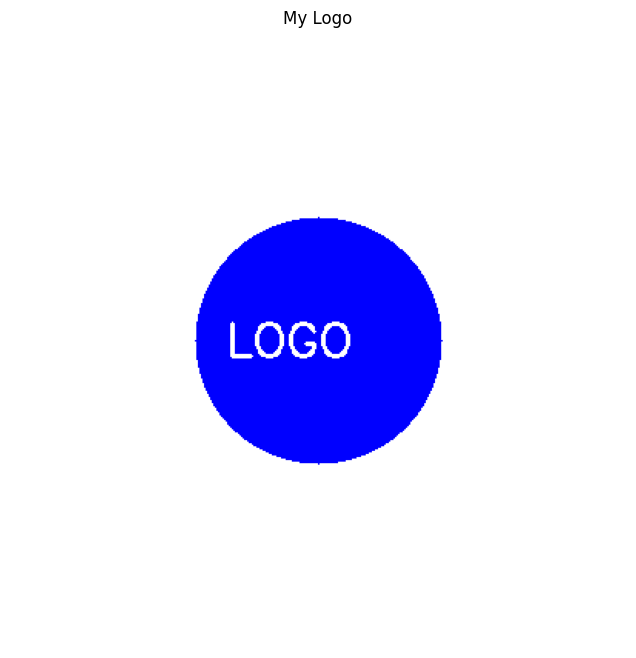

In [19]:
# Exercise 1: Create your own logo
# TODO: Use drawing functions to create a logo or icon

logo = np.ones((400, 400, 3), dtype=np.uint8) * 255

# Your code here - be creative!
# Hints:
# - Use circles for round shapes
# - Use rectangles for boxes
# - Use lines for connections
# - Use text to add labels

# Example starter code (replace with your design):
cv.circle(logo, (200, 200), 80, (255, 0, 0), -1)
cv.putText(logo, 'LOGO', (140, 210), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

plt.imshow(cv.cvtColor(logo, cv.COLOR_BGR2RGB))
plt.title('My Logo')
plt.axis('off')
plt.show()

### Exercise 2: Create an Animated GIF

Create a simple animation by drawing shapes at different positions across multiple frames.

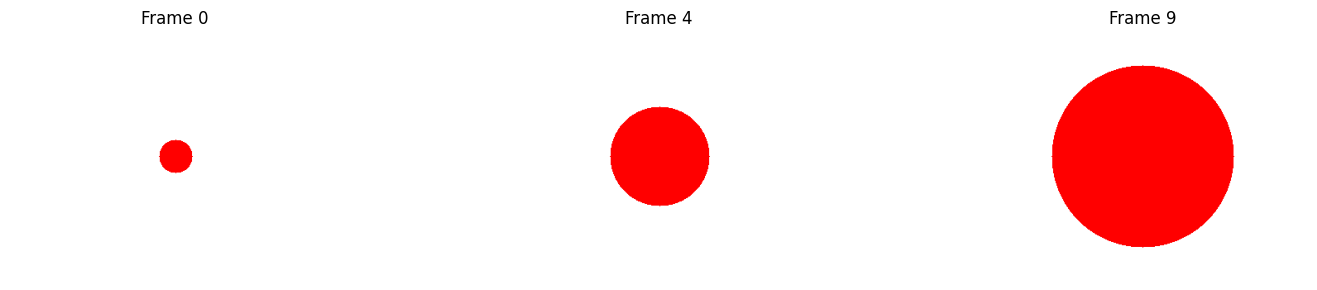

In [20]:
# Exercise 2: Create an animation
# TODO: Create multiple frames showing an object moving or changing

frames_list = []
num_frames = 10

for i in range(num_frames):
    frame = np.ones((300, 400, 3), dtype=np.uint8) * 255
    
    # TODO: Draw something that changes position/size/color
    # Hint: Use the variable 'i' to change properties
    
    # Example: A growing circle
    radius = 20 + (i * 10)
    cv.circle(frame, (200, 150), radius, (0, 0, 255), -1)
    
    frames_list.append(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

# Display some frames
plt.figure(figsize=(15, 3))
for idx, frame_num in enumerate([0, 4, 9]):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(frames_list[frame_num])
    plt.title(f'Frame {frame_num}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Exercise 3: Draw a Simple Face

Create a smiley face using circles, ellipses, and arcs.

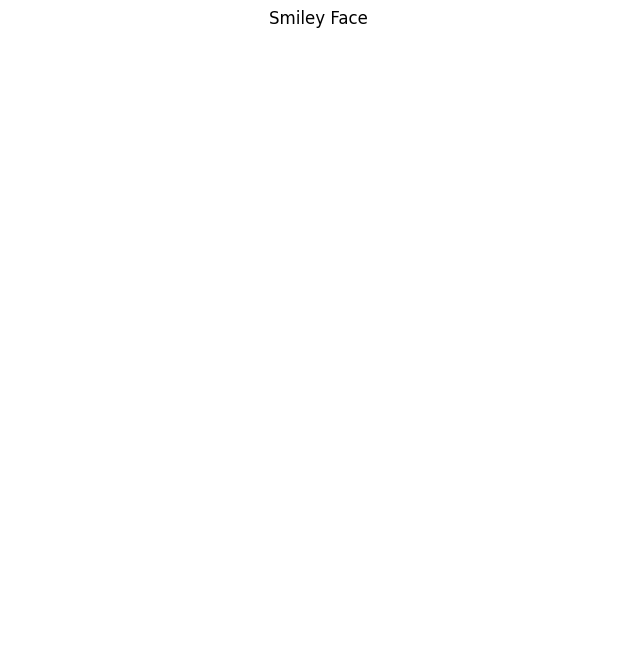

In [21]:
# Exercise 3: Draw a face
# TODO: Create a smiley face

face = np.ones((400, 400, 3), dtype=np.uint8) * 255

# Hints:
# - Face outline: large circle
# - Eyes: two small filled circles
# - Smile: an arc (use cv.ellipse with partial angles)

# Your code here!

plt.imshow(cv.cvtColor(face, cv.COLOR_BGR2RGB))
plt.title('Smiley Face')
plt.axis('off')
plt.show()

---

## Summary

Congratulations! You've completed the "Getting Started with OpenCV" notebook. You now know:

✓ How to load, display, and save images  
✓ The "Tiga Sekawan" for images (imread, imshow, waitKey)  
✓ The "Empat Sekawan" for videos (VideoCapture, read, imshow, release)  
✓ How to work with video files  
✓ How to convert images to grayscale  
✓ How to draw lines, rectangles, circles, ellipses, and polygons  
✓ How to add text to images  
✓ The difference between BGR and RGB color formats  

### Key Takeaways:

1. **OpenCV uses BGR** (not RGB) - always convert for display with Matplotlib
2. **Images are NumPy arrays** - you can use array operations on them
3. **Videos are sequences of frames** - each frame is an image
4. **Grayscale is faster** - use it when color is not important
5. **Drawing functions are powerful** - useful for visualization and annotation

---

## What's Next?

In the next notebook (**02_image_basics_roi.ipynb**), you'll learn:
- How to access and modify individual pixels
- How to work with image properties (size, shape, type)
- **Region of Interest (ROI)** - selecting specific parts of images
- **Region of Non-Interest (RONI)** - masking unwanted areas
- Splitting and merging color channels
- Image arithmetic operations (addition, blending)

---

## Real-World Applications

The skills you learned in this notebook are used in:

- **Object Detection**: Drawing bounding boxes around detected objects
- **Face Recognition**: Marking facial features with shapes
- **Video Surveillance**: Processing video feeds frame by frame
- **Augmented Reality**: Drawing virtual objects on real images
- **Medical Imaging**: Annotating X-rays and scans
- **Sports Analysis**: Tracking player movements in videos

Keep practicing and experimenting!

---

**Happy Coding!** 🎨📷